In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('churn.all')

In [2]:
import os 
print(os.getcwd())

C:\Users\princ\Downloads\project


In [3]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [4]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by churned or not
    if continuous:
        sns.boxplot(x=col_name, y='churned', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['ch'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction churned')
        ax2.set_title('churned Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'churned', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='churned', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

In [6]:
missing_values_table(df)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


In [7]:
df.head(5000)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False.
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True.
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False.
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False.


In [8]:
df['voice_mail_plan'][0]
#df['intl_plan'][0]
#df['churned'][0]

' yes'

In [9]:
df['voice_mail_plan'] = df['voice_mail_plan'].map(lambda x: x.strip())
df['intl_plan'] = df['intl_plan'].map(lambda x: x.strip())
df['churned'] = df['churned'].map(lambda x: x.strip())

In [10]:
df['voice_mail_plan'][0]

'yes'

In [11]:
# yes/no -> 0/1
df['voice_mail_plan'] = df['voice_mail_plan'].map({'no':0, 'yes':1})
df.intl_plan = df.intl_plan.map({'no':0, 'yes':1})


In [12]:
df.sample(5)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
951,VT,101,415,407-2292,0,0,0,153.8,89,26.15,234.0,89,19.89,196.3,77,8.83,11.6,2,3.13,4,False.
4519,MO,90,408,398-4699,1,0,0,207.1,87,35.21,208.5,87,17.72,146.0,95,6.57,4.4,5,1.19,2,False.
3552,HI,103,415,403-3365,0,0,0,245.8,116,41.79,135.4,97,11.51,190.9,73,8.59,9.9,7,2.67,1,False.
475,AR,74,510,329-9046,0,0,0,148.5,111,25.25,146.5,42,12.45,289.2,83,13.01,9.9,6,2.67,3,False.
971,TN,59,415,399-5564,0,0,0,160.9,95,27.35,251.2,65,21.35,273.4,97,12.30,5.0,5,1.35,3,False.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
intl_plan                        5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes             

In [14]:
df.churned.value_counts(normalize=True)

False.    0.8586
True.     0.1414
Name: churned, dtype: float64

In [15]:
df.sample(1)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
3163,NC,122,510,329-5400,0,1,30,230.1,108,39.12,287.6,76,24.45,177.1,85,7.97,6.9,3,1.86,2,False.


In [16]:
#df.groupby('number_vmail_messages')['churned'].value_counts(normalize=True).loc[:,'True.']

In [17]:
df.groupby('churned').mean()

,account_length,area_code,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churned,,,,,,,,,,,,,,,,,,
False.,99.917074,436.736781,0.063825,0.284416,8.291870,175.746564,99.899604,29.877494,198.805031,100.241556,16.898654,199.455113,99.975775,8.975593,10.190869,4.481947,2.752055,1.457722
True.,102.332390,437.971711,0.281471,0.144272,4.496464,207.870580,100.817539,35.338416,211.757850,99.884017,17.999562,206.078218,99.575672,9.273607,10.692362,4.151344,2.887426,2.254597


In [18]:
from scipy.stats import ks_2samp
def run_KS_test(feature):
    dist1 = df.loc[df.churned == 'False.',feature]
    dist2 = df.loc[df.churned == 'True.',feature]
    print(feature+':')
    print(ks_2samp(dist1,dist2),'\n')

In [19]:
from statsmodels.stats.proportion import proportions_ztest
def run_proportion_Z_test(feature):
    dist1 = df.loc[df.churned == 'False.', feature]
    dist2 = df.loc[df.churned == 'True.', feature]
    n1 = len(dist1)
    p1 = dist1.sum()
    n2 = len(dist2)
    p2 = dist2.sum()
    z_score, p_value = proportions_ztest([p1, p2], [n1, n2])
    print(feature+':')
    print('z-score = {}; p-value = {}'.format(z_score, p_value),'\n')

In [20]:
from scipy.stats import chi2_contingency
def run_chi2_test(df, feature):

    dist1 = df.loc[df.churned == 'False.',feature].value_counts().sort_index().tolist()
    dist2 = df.loc[df.churned == 'True.',feature].value_counts().sort_index().tolist()
    chi2, p, dof, expctd = chi2_contingency([dist1,dist2])
    print(feature+':')
    print("chi-square test statistic:", chi2)
    print("p-value", p, '\n')

In [21]:
ks_list = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

In [22]:
z_list = ['voice_mail_plan','intl_plan' ]

In [23]:
for ks_element in ks_list:
    run_KS_test(ks_element)
for z_element in z_list:
    run_proportion_Z_test(z_element)

account_length:
Ks_2sampResult(statistic=0.041589364087651653, pvalue=0.22738382347527208) 

number_vmail_messages:
Ks_2sampResult(statistic=0.13991198460966192, pvalue=9.543970926407943e-11) 

total_day_minutes:
Ks_2sampResult(statistic=0.3045380608740718, pvalue=2.5185677370769294e-49) 

total_day_calls:
Ks_2sampResult(statistic=0.0374314160975846, pvalue=0.35289636482758535) 

total_day_charge:
Ks_2sampResult(statistic=0.3045380608740718, pvalue=2.5185677370769294e-49) 

total_eve_minutes:
Ks_2sampResult(statistic=0.11320491138661636, pvalue=3.499539898662391e-07) 

total_eve_calls:
Ks_2sampResult(statistic=0.02443964072957161, pvalue=0.851266383906971) 

total_eve_charge:
Ks_2sampResult(statistic=0.11320491138661636, pvalue=3.499539898662391e-07) 

total_night_minutes:
Ks_2sampResult(statistic=0.06274383053759104, pvalue=0.01680040720248898) 

total_night_calls:
Ks_2sampResult(statistic=0.0302110175078604, pvalue=0.624008779820064) 

total_night_charge:
Ks_2sampResult(statistic=0.0

In [24]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [25]:
ks_list = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

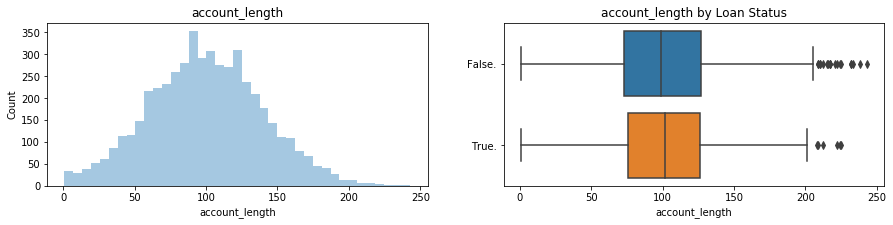

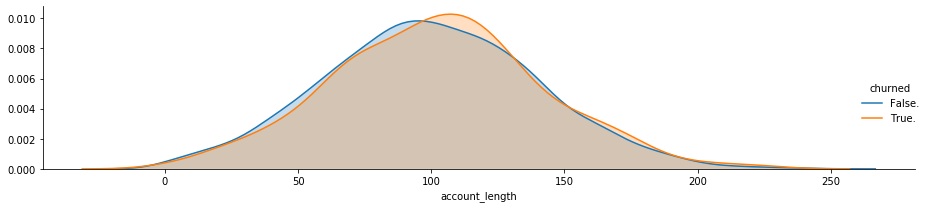

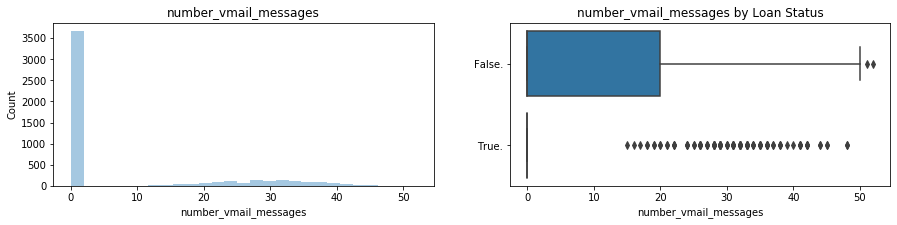

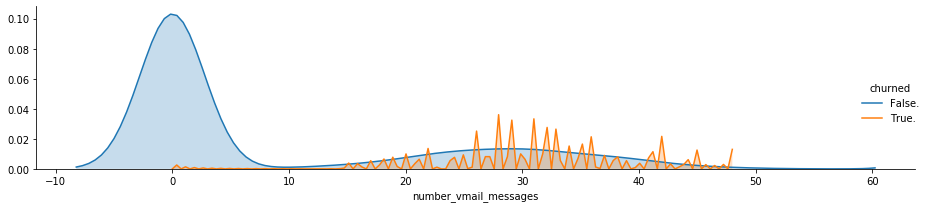

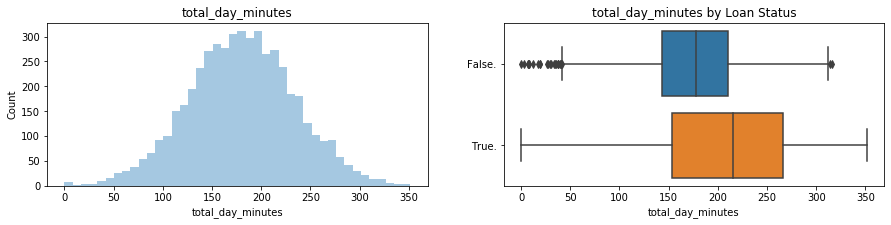

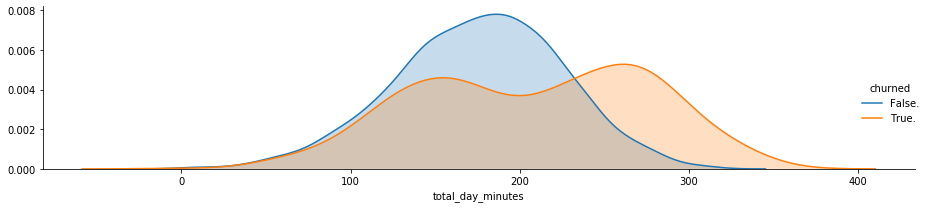

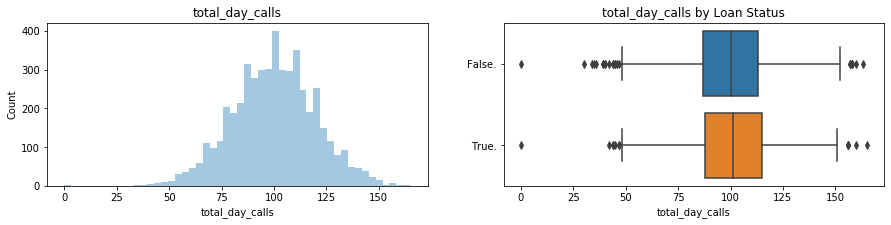

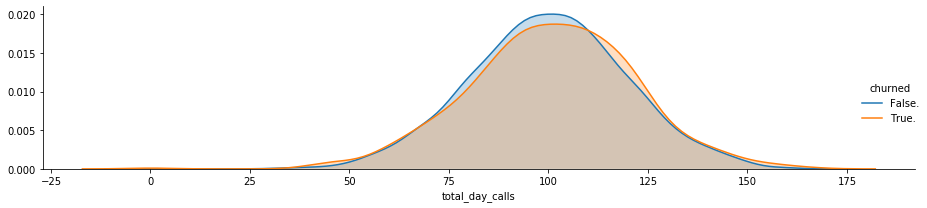

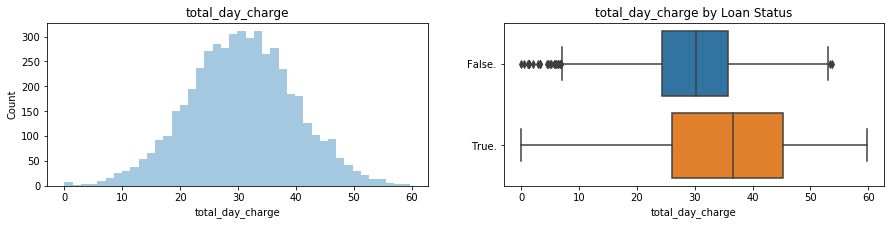

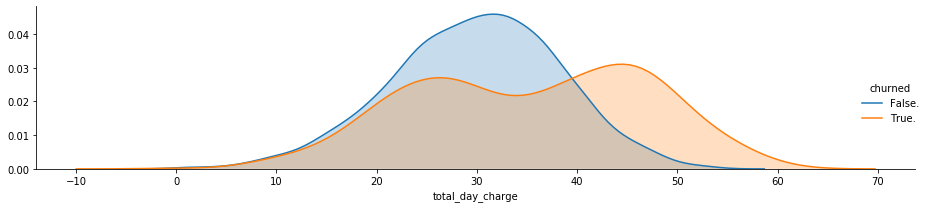

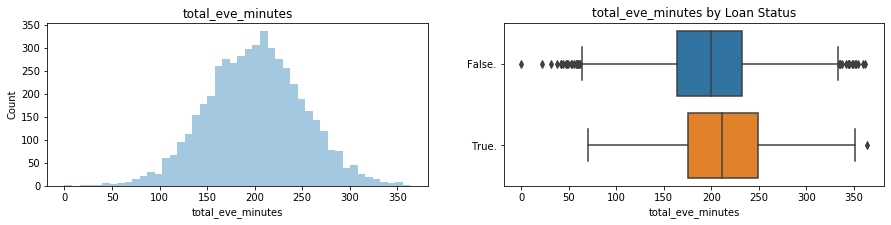

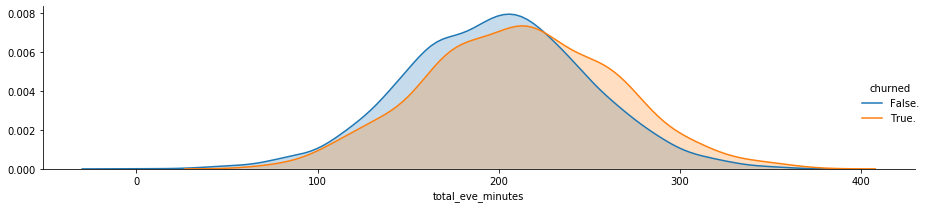

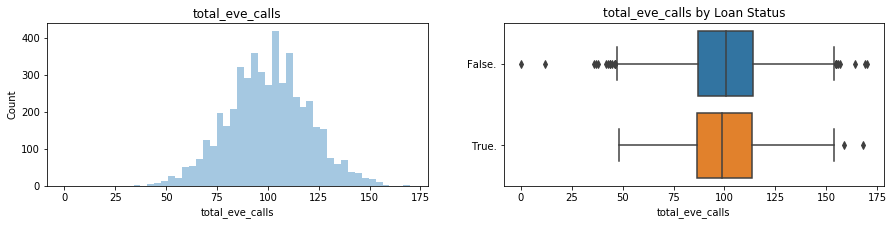

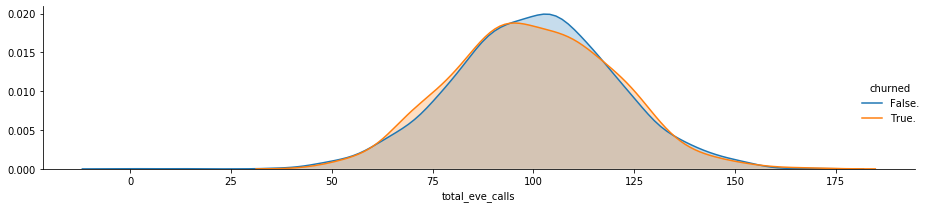

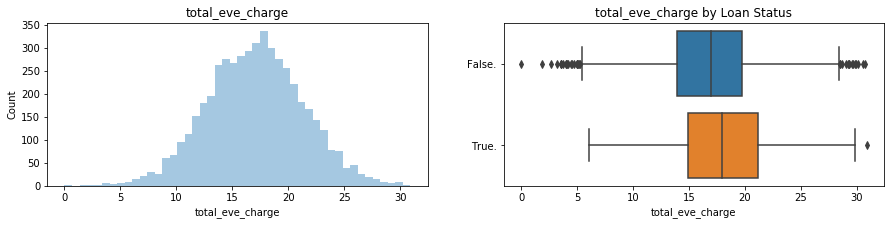

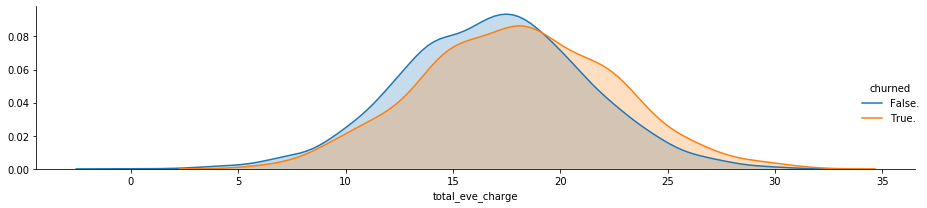

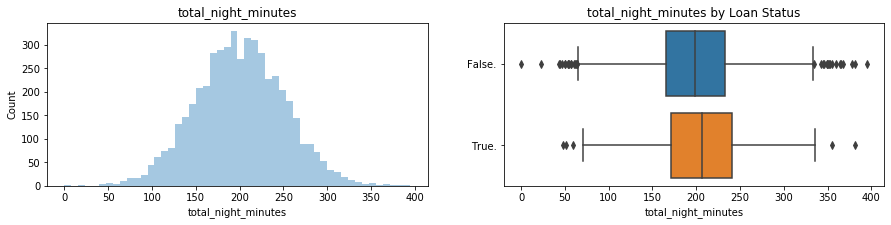

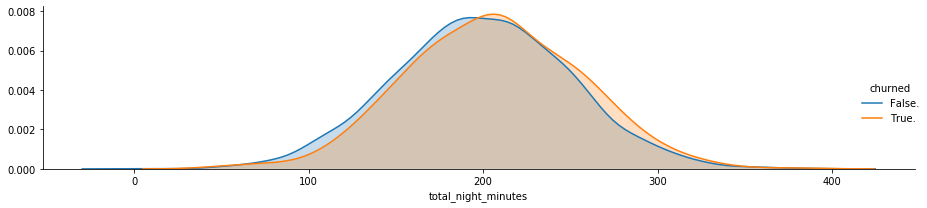

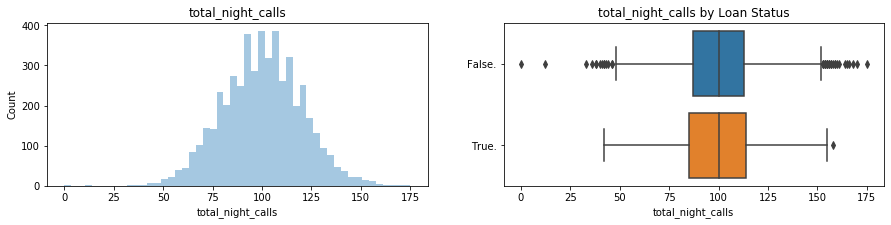

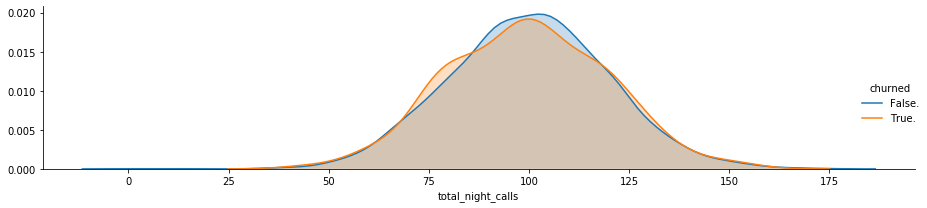

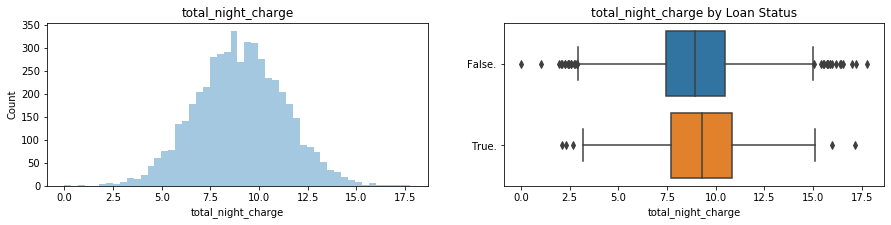

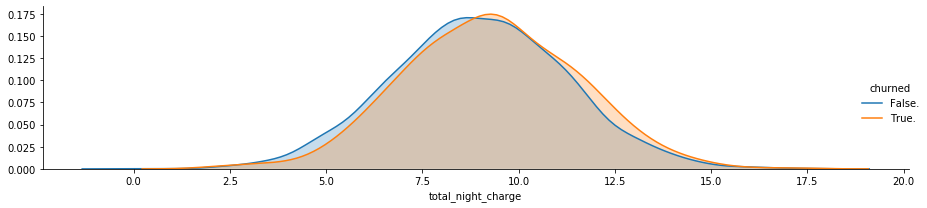

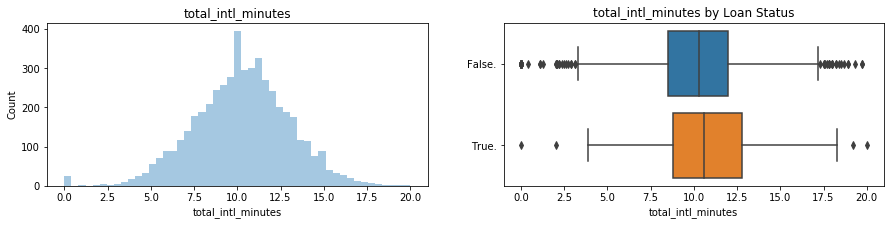

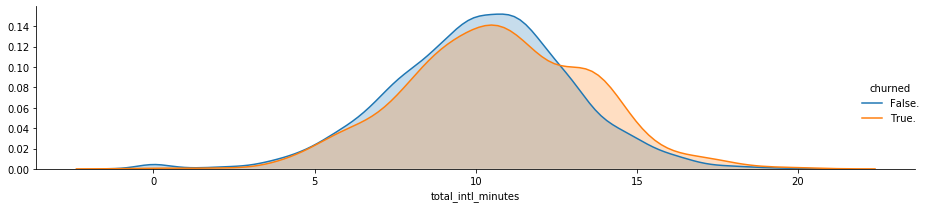

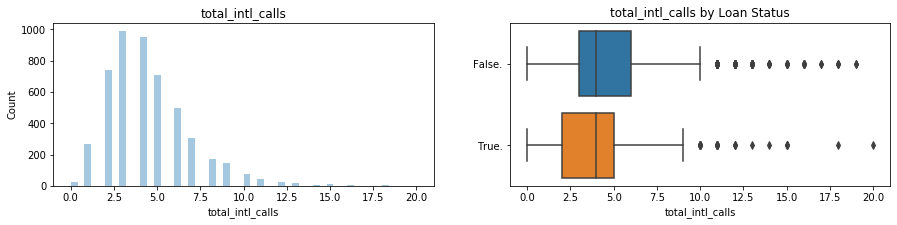

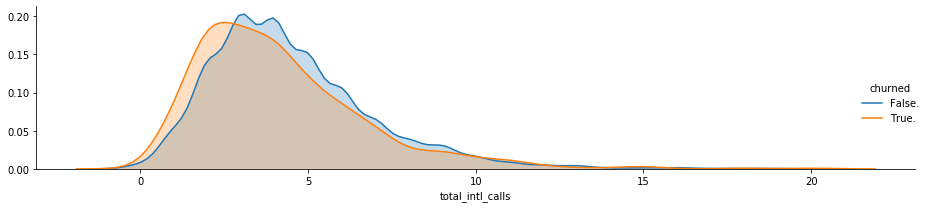

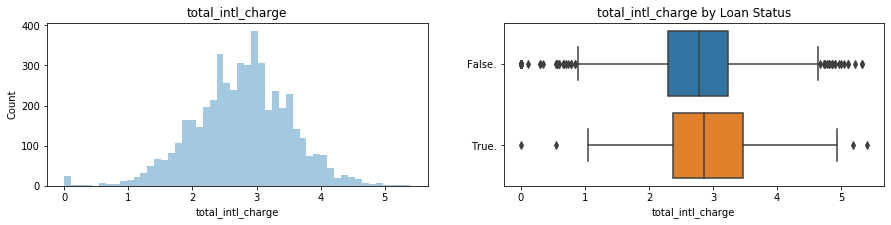

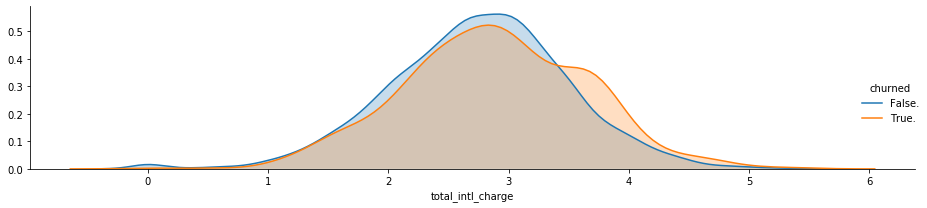

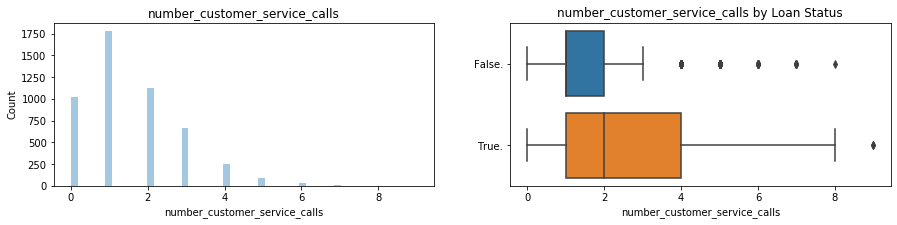

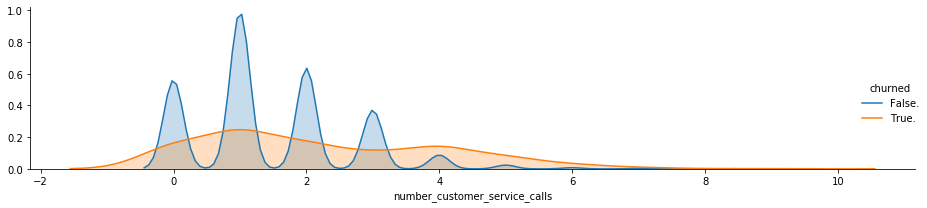

In [26]:
for plot_element in ks_list:
    plot_var(plot_element, plot_element, continuous=True)

I now have an idea about how each feature behaves for churned/stayed customers. 
I will check the correlation between features and with the target variable. 

#### Linear Correlation 

In [27]:
df.churned = df.churned.map({'False.':0, 'True.':1})

In [28]:
corr = df.drop(['area_code'], axis=1).corr()
#corr

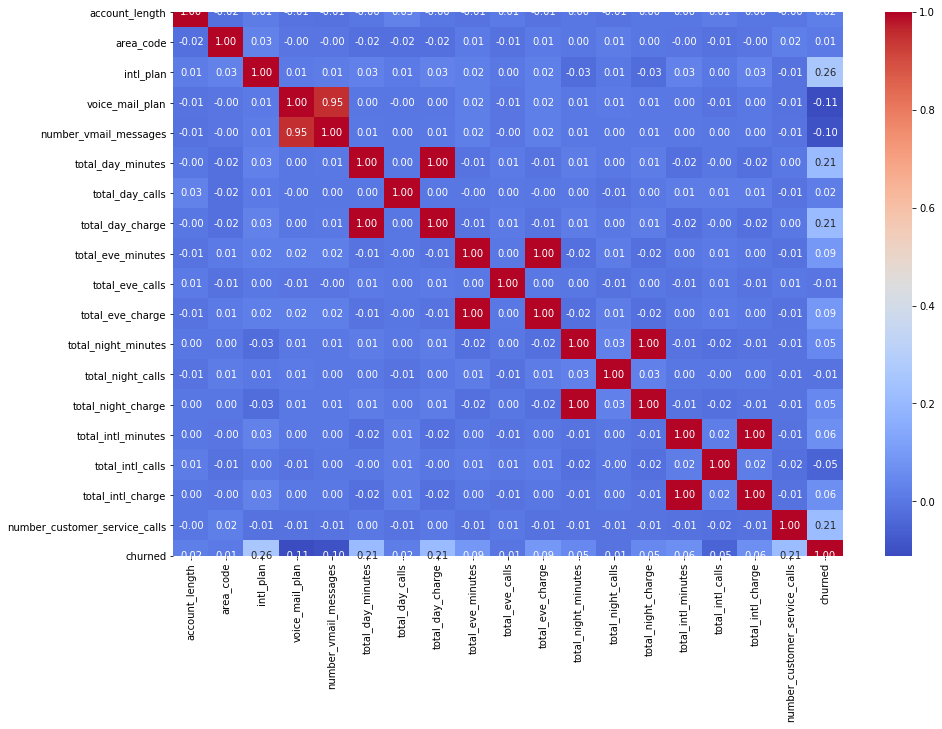

In [29]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

# Part 2: Feature Preprocessing

In [30]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [31]:
# Drop some useless columns
drop_list = ['state', 'account_length', 'total_day_calls', 'total_eve_calls', 'total_night_calls','total_day_minutes', 'total_eve_minutes','total_night_minutes','voice_mail_plan', 'area_code','phone_number','total_intl_minutes', 'total_intl_calls','churned']

In [32]:
X = df.drop(drop_list, axis=1)
y = df.churned.values

In [33]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X.head(5)

,intl_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls
0,0,25,45.07,16.78,11.01,2.70,1
1,0,26,27.47,16.62,11.45,3.70,1
2,0,0,41.38,10.30,7.32,3.29,0
3,1,0,50.90,5.26,8.86,1.78,2
4,1,0,28.34,12.61,8.41,2.73,3


In [35]:
# imputing missing values

In [36]:
a1_train=X_train.values
a1_test=X_test.values

In [37]:
X_train

,intl_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls
4227,0,0,12.53,13.64,9.64,3.51,3
4676,1,29,15.67,17.00,5.36,1.54,1
800,0,27,44.42,18.78,8.07,3.05,1
3671,0,0,23.49,14.99,8.23,3.00,3
4193,0,0,22.51,21.60,7.94,3.51,2
...,...,...,...,...,...,...,...
4426,0,0,40.83,9.15,7.05,2.03,1
466,0,36,38.45,15.44,11.65,2.84,3
3092,0,0,16.00,12.55,9.61,2.73,0
3772,0,0,32.86,20.41,6.56,3.29,1


In [38]:
a1_train[0]

array([ 0.  ,  0.  , 12.53, 13.64,  9.64,  3.51,  3.  ])

In [39]:
list_min_max=[]
for i in range(7):
    list_min_max.append([min(a1_train[:,i]),max(a1_train[:,i])])
    print(i,min(a1_train[:,i]),max(a1_train[:,i]))

0 0.0 1.0
1 0.0 52.0
2 0.44 59.76
3 1.9 30.75
4 1.97 17.77
5 0.0 5.4
6 0.0 9.0


In [40]:
for i in range(7):
    a1_train[:,i]=(a1_train[:,i]-list_min_max[i][0])/(list_min_max[i][1]-list_min_max[i][0])

In [41]:
a1_train[0]

array([0.        , 0.        , 0.20380984, 0.40693241, 0.48544304,
       0.65      , 0.33333333])

In [42]:
for i in range(7):
    a1_test[:,i]=(a1_test[:,i]-list_min_max[i][0])/(list_min_max[i][1]-list_min_max[i][0])

In [43]:
y_train.shape
y_test.shape

(1000,)

In [44]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

print("Feature space holds %d observations and %d features" % X_train.shape)
print("Unique target labels:", np.unique(y_train))

Feature space holds 4000 observations and 7 features
Unique target labels: [0 1]


In [45]:
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#from xgboost import  XGBClassifier

In [46]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

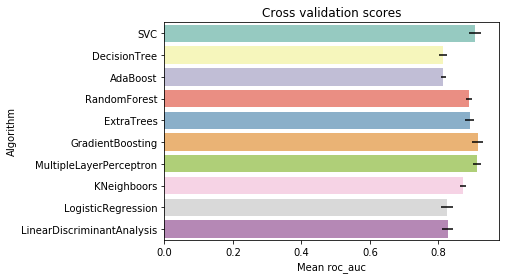

In [47]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
#classifiers.append(XGBClassifier(random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")


In [66]:
### SVC classifier
svm = SVC(probability=True)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

grid_svm = GridSearchCV(svm, param_grid = svm_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [67]:
svm_best = grid_svm.best_estimator_
# Best score
print('Best Score:', grid_svm.best_score_)
print('Best parameters set: \n', grid_svm.best_params_)

Best Score: 0.9070896685031264
Best parameters set: 
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [68]:
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:,1]

In [69]:
### SVC classifier
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   60.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False, random_state=42,
                      

In [70]:
rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.9145310963192695
Best parameters set: 
 {'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [71]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

In [72]:
### KNN classifier
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [4, 8, 16],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [73]:
knn_best = grid_knn.best_estimator_
# Best score
print('Best Score:', grid_knn.best_score_)
print('Best parameters set: \n', grid_knn.best_params_)

Best Score: 0.9085381396270955
Best parameters set: 
 {'n_neighbors': 16, 'weights': 'uniform'}


In [74]:
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:,1]

In [75]:
### Logistic Regression classifier

lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid, scoring='roc_auc')
grid_lr.fit(X_train, y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.00...
       0.17782794, 0.19054607, 0.20417379, 0.21877616, 0.23442288,
       0.25118864, 0.26915348, 0.28840315, 0.30902954, 0.33113112,
       0.35481339, 0.3801894 , 0.40738028, 0.43651583, 0.46773514,
       0.50118723, 0.5370318 , 0.57543994, 0.616595  , 0.66069345,
       0.70794578, 0.7585

In [76]:
lr_best = grid_lr.best_estimator_
# Best score
print('Best Score:', grid_lr.best_score_)
print('Best parameters set: \n', grid_lr.best_params_)

Best Score: 0.8254500048075706
Best parameters set: 
 {'C': 0.003019951720402016, 'penalty': 'l2'}


In [77]:
y_pred_lr = lr_best.predict(X_test)
y_prob_lr = lr_best.predict_proba(X_test)[:,1]

In [78]:
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X_train, y_train)
LRmodel_l1.coef_[0]
print("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]),X_train.columns), key=lambda kv:(-abs(kv[0]),kv[1])):
    print(v + ": " + str(k))

Logistic Regression (L1) Coefficients
total_day_charge: 0.7139
number_customer_service_calls: 0.6919
intl_plan: 0.6115
number_vmail_messages: -0.401
total_eve_charge: 0.3525
total_intl_charge: 0.2314
total_night_charge: 0.1926


In [79]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X_train, y_train)
LRmodel_l2.coef_[0]
print("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      X_train.columns), key=lambda kv:(-abs(kv[0]),kv[1
])):
    print(v + ": " + str(k))

Logistic Regression (L2) Coefficients
total_day_charge: 0.7136
number_customer_service_calls: 0.6919
intl_plan: 0.6116
number_vmail_messages: -0.4023
total_eve_charge: 0.3538
total_intl_charge: 0.2331
total_night_charge: 0.1944


In [80]:
from sklearn.feature_selection import RFE

rfe_l1 = RFE(LRmodel_l1, n_features_to_select=1) # If None, half of the features are selected.
rfe_l1.fit(X_train, y_train)
print("Logistic Regression (L1) RFE Result")
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l1.ranking_), X_train.columns)):
    print(v + ": " + str(k))

Logistic Regression (L1) RFE Result
total_day_charge: 1
number_customer_service_calls: 2
intl_plan: 3
number_vmail_messages: 4
total_eve_charge: 5
total_intl_charge: 6
total_night_charge: 7


In [81]:
from sklearn.feature_selection import RFE
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1) # If None, half of the features are selected.
rfe_l2.fit(X_train, y_train)
print("Logistic Regression (L2) RFE Result")
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), X_train.columns)):
    print(v + ": " + str(k))

Logistic Regression (L2) RFE Result
total_day_charge: 1
number_customer_service_calls: 2
intl_plan: 3
number_vmail_messages: 4
total_eve_charge: 5
total_intl_charge: 6
total_night_charge: 7


In [82]:
# Gradient boosting tunning
gb = GradientBoostingClassifier(random_state=random_state)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_gb.fit(X_train,y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   33.0s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split...
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verb

In [83]:
gb_best = grid_gb.best_estimator_
# Best score
print('Best Score:', grid_gb.best_score_)
print('Best parameters set: \n', grid_gb.best_params_)

Best Score: 0.9150237686231735
Best parameters set: 
 {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300}


In [84]:
y_pred_gb = gb_best.predict(X_test)
y_prob_gb = gb_best.predict_proba(X_test)[:,1]

#### XGBoost

In [85]:
# XGboost tunning
xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:   21.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n

In [86]:
xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.9197476799023991
Best parameters set: 
 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}


In [87]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

In [88]:
# print a summary of the scores
def print_grid_search_metrics(gs):
    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [89]:
"""
print_grid_search_metrics(grid_svm)
print_grid_search_metrics(grid_rf)
print_grid_search_metrics(grid_gb)
print_grid_search_metrics(grid_knn)
print_grid_search_metrics(grid_lr)
print_grid_search_metrics(grid_xgb)
"""

'\nprint_grid_search_metrics(grid_svm)\nprint_grid_search_metrics(grid_rf)\nprint_grid_search_metrics(grid_gb)\nprint_grid_search_metrics(grid_knn)\nprint_grid_search_metrics(grid_lr)\nprint_grid_search_metrics(grid_xgb)\n'

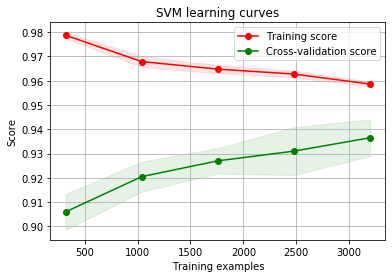

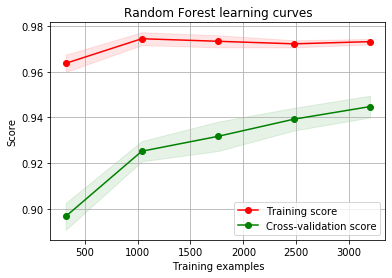

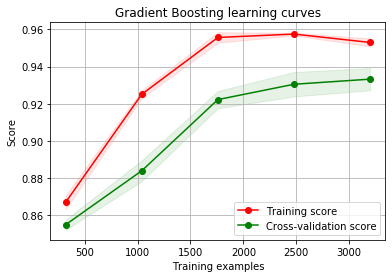

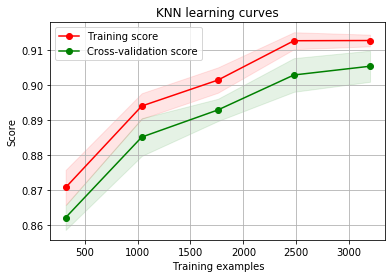

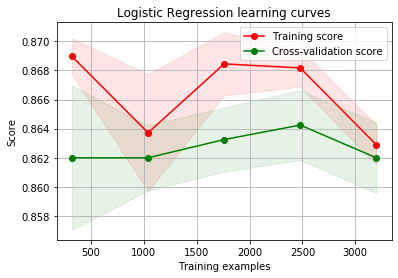

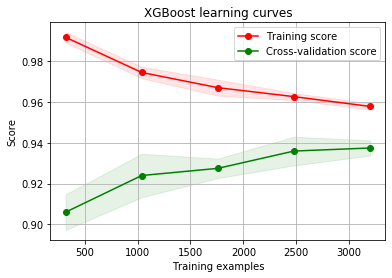

In [90]:
# Plot learning curves
#grid_svm, grid_rf, grid_gb, grid_knn, grid_lr, grid_xgb

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_svm.best_estimator_,"SVM learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_gb.best_estimator_,"Gradient Boosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_knn.best_estimator_,"KNN learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_lr.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

In [91]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
Gradient Boosting
Accuracy is 0.944
Precision is 0.9191919191919192
Recall is 0.6546762589928058
F1 score is 0.7647058823529412
ROC AUC is 0.9081877355258651


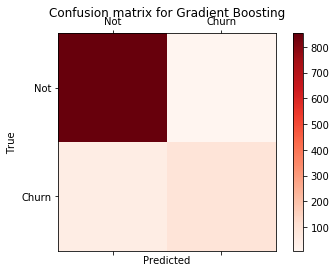

Logisitic Regression
Accuracy is 0.871
Precision is 0.631578947368421
Recall is 0.17266187050359713
F1 score is 0.2711864406779661
ROC AUC is 0.8285580594757643


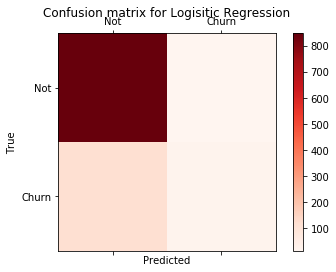

K-Nearest-Neighbors
Accuracy is 0.915
Precision is 0.95
Recall is 0.41007194244604317
F1 score is 0.5728643216080402
ROC AUC is 0.8919985962449554


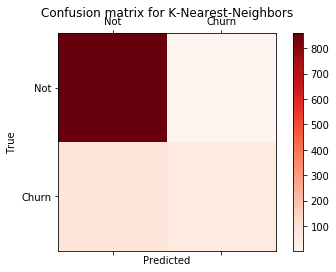

Random Forest
Accuracy is 0.943
Precision is 0.8942307692307693
Recall is 0.6690647482014388
F1 score is 0.7654320987654322
ROC AUC is 0.8992471528004078


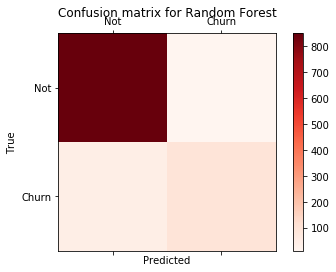

Support Vector Machine
Accuracy is 0.943
Precision is 0.8867924528301887
Recall is 0.6762589928057554
F1 score is 0.7673469387755103
ROC AUC is 0.9090734381136205


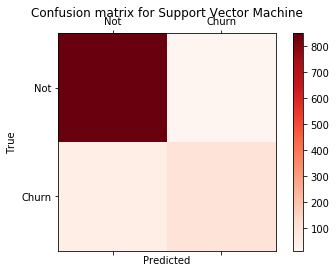

In [92]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("Gradient Boosting", confusion_matrix(y_test, y_pred_gb), roc_auc_score(y_test, y_prob_gb)),
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr)),
    ("K-Nearest-Neighbors", confusion_matrix(y_test, y_pred_knn), roc_auc_score(y_test, y_prob_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("Support Vector Machine", confusion_matrix(y_test, y_pred_svm), roc_auc_score(y_test, y_prob_svm))
    
]

draw_confusion_matrices(confusion_matrices)

In [93]:
"""
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
importances = forest.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X_train.columns), reverse=True):
    print(v + ": " + str(k))
"""

'\nforest = RandomForestClassifier()\nforest.fit(X_train, y_train)\nimportances = forest.feature_importances_\n# Print the feature ranking\nprint("Feature importance ranking by Random Forest Model:")\nfor k,v in sorted(zip(map(lambda x: round(x, 4), importances), X_train.columns), reverse=True):\n    print(v + ": " + str(k))\n'

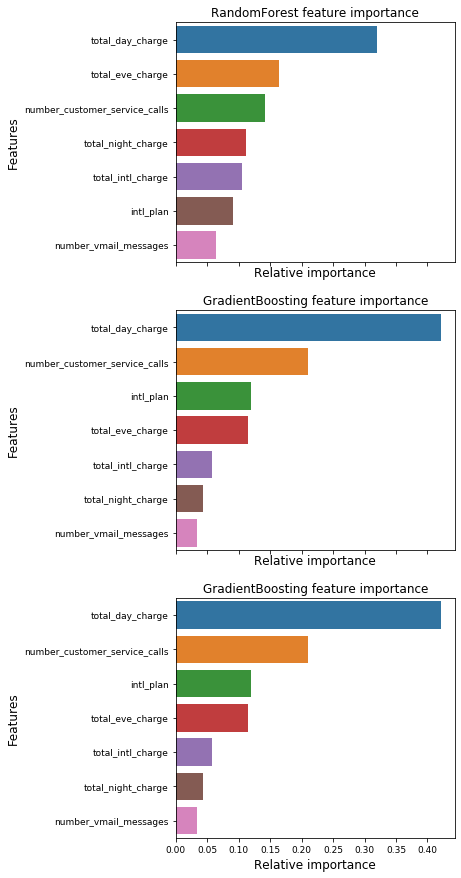

In [94]:
#nrows = ncols = 2
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("RandomForest",rf_best),("GradientBoosting",gb_best),("GradientBoosting",gb_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

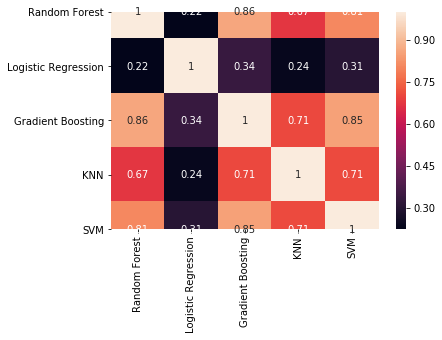

In [95]:
# Concatenate all classifier results

test_rf = pd.Series(rf_best.predict(X_test), name="Random Forest")
test_lr = pd.Series(lr_best.predict(X_test), name="Logistic Regression")
test_gb = pd.Series(gb_best.predict(X_test), name="Gradient Boosting")
test_knn = pd.Series(knn_best.predict(X_test), name="KNN")
test_svm = pd.Series(svm_best.predict(X_test), name="SVM")
#test_xgb = pd.Series(xgb_best.predict(X_test), name="XGBoost")


ensemble_results = pd.concat([test_rf, test_lr,test_gb,test_knn, test_svm],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

In [96]:
votingC = VotingClassifier(estimators=[('rf', rf_best), ('lr',lr_best),('knn', knn_best),
('svm', svm_best), ('gb',gb_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [97]:
y_pred_voting = votingC.predict(X_test)
y_prob_voting = votingC.predict_proba(X_test)[:,1]

Ensemble modeling
Accuracy is 0.947
Precision is 0.9777777777777777
Recall is 0.6330935251798561
F1 score is 0.7685589519650655
ROC AUC is 0.9081459571019143


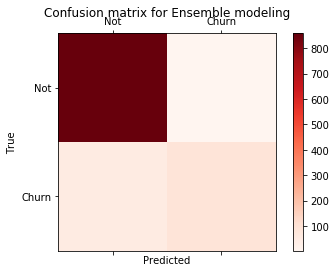

In [98]:
confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(y_test, y_pred_voting), roc_auc_score(y_test, y_prob_voting))   
]
draw_confusion_matrices(confusion_matrices)

The AUROC score of 0.9092 is smaller than the XGBoost score of 0.9109. Therefore, I will use XGboost for the final prediction. 

XGboost
Accuracy is 0.939
Precision is 0.8421052631578947
Recall is 0.6906474820143885
F1 score is 0.758893280632411
ROC AUC is 0.9131050560248665


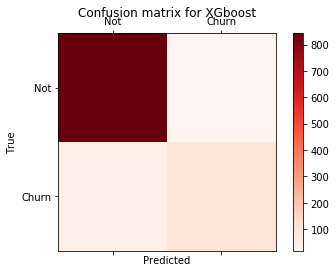

In [99]:
confusion_matrices = [
    ("XGboost", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
]

draw_confusion_matrices(confusion_matrices)

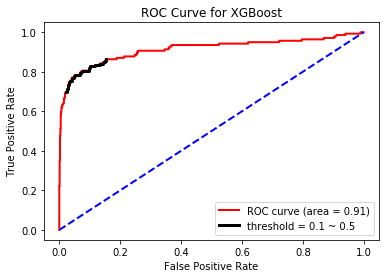

In [100]:
# make the ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_prob_xgb, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

In [101]:
acc_grid = np.zeros(thresh.shape)
prec_grid = np.zeros(thresh.shape)
recall_grid = np.zeros(thresh.shape)
TP_grid = np.zeros(thresh.shape)
FP_grid = np.zeros(thresh.shape)
FN_grid = np.zeros(thresh.shape)

for i in range(thresh.shape[0]):
    cm = confusion_matrix(y_test, y_prob_xgb >= thresh[i])
    acc_grid[i] = accuracy_score(y_test, y_prob_xgb >= thresh[i])
    prec_grid[i] = precision_score(y_test, y_prob_xgb >= thresh[i])
    recall_grid[i] = recall_score(y_test, y_prob_xgb >= thresh[i])
    TP_grid[i] = cm[1][1]
    FP_grid[i] = cm[0][1]
    FN_grid[i] = cm[1][0]

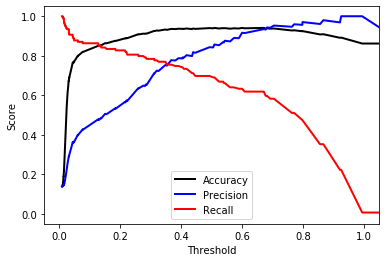

In [102]:
fig = plt.figure()
plt.plot(thresh, acc_grid, color='k', lw=2, label='Accuracy')
plt.plot(thresh, prec_grid, color='b', lw=2, label='Precision')
plt.plot(thresh, recall_grid, color='r', lw=2, label='Recall')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc="lower center")
plt.show()


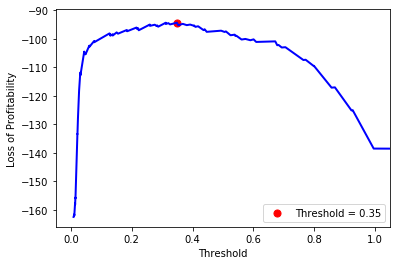

In [103]:
P = 0.5 # The chance a customer who was going to drop would take the special offer
loss = TP_grid*P*(-0.1) + TP_grid*(1-P)*(-1) + FN_grid*(-1) + FP_grid*(-0.1)
thresh_best = thresh[loss == max(loss)][0]
    
fig = plt.figure()
plt.plot(thresh, loss, color='b', lw=2)
plt.scatter([thresh_best], [max(loss)], color='r', s=50, label='Threshold = {:.2f}'.format(thresh_best))
plt.xlim([-0.05, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Loss of Profitability')
plt.legend(loc="lower right")
plt.show()


XGboost
Accuracy is 0.932
Precision is 0.75177304964539
Recall is 0.762589928057554
F1 score is 0.757142857142857
ROC AUC is 0.9131050560248665


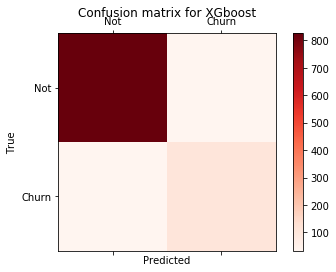

In [104]:
y_pred_xgb_new = y_prob_xgb > thresh_best

confusion_matrices = [
    ("XGboost", confusion_matrix(y_test, y_pred_xgb_new), roc_auc_score(y_test, y_prob_xgb))
]

draw_confusion_matrices(confusion_matrices)

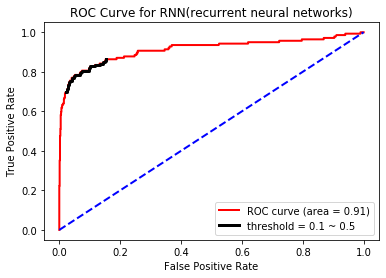

In [105]:
fpr, tpr, thresh = roc_curve(y_test, y_prob_xgb, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RNN(recurrent neural networks)')
plt.legend(loc="lower right")
plt.show()

In [106]:
import keras

Using TensorFlow backend.


In [107]:
from keras.models import Sequential
from keras.layers import Dense

In [108]:
classifier=Sequential()

In [109]:
classifier.add(Dense(output_dim=10,init='uniform',activation='relu',input_dim=7))

In [110]:
classifier.add(Dense(output_dim=4,init='uniform',activation='relu'))

In [111]:
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

In [112]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [113]:
classifier.fit(a1_train,y_train,batch_size=10,nb_epoch=100)

Epoch 1/100
4000/4000 [==============================] - 3s 797us/step - loss: 0.5222 - accuracy: 0.8565
Epoch 2/100
4000/4000 [==============================] - 2s 440us/step - loss: 0.4105 - accuracy: 0.8580
Epoch 3/100
4000/4000 [==============================] - 2s 472us/step - loss: 0.4020 - accuracy: 0.8580
Epoch 4/100
4000/4000 [==============================] - 2s 600us/step - loss: 0.3942 - accuracy: 0.8580
Epoch 5/100
4000/4000 [==============================] - 3s 801us/step - loss: 0.3866 - accuracy: 0.8580
Epoch 6/100
4000/4000 [==============================] - 4s 951us/step - loss: 0.3798 - accuracy: 0.8580
Epoch 7/100
4000/4000 [==============================] - 2s 465us/step - loss: 0.3742 - accuracy: 0.8580
Epoch 8/100
4000/4000 [==============================] - 2s 547us/step - loss: 0.3697 - accuracy: 0.85800s - loss: 0.3
Epoch 9/100
4000/4000 [==============================] - 3s 684us/step - loss: 0.3649 - accuracy: 0.85800s - loss: 0.3642 - accuracy - ETA: 0s - l

In [114]:
y_pred=classifier.predict(X_test)

In [115]:
type(X_test)

pandas.core.frame.DataFrame

In [116]:
y_pred[0]

array([4.541718e-08], dtype=float32)

In [ ]:
print("we have 4 plans of price 200,400,600,800 0fwhich we will give 100 message,80 call minutes and so on")
a=int(input("enter the plan between 1,2,3,4"))
p=int(input( '1st'))
q=int(input('2nd'))
r=int(input('3'))
s=int(input('4'))
t=float(input('5'))
u=int(input('6'))
v=int(input('7'))

Xnew = np.array([[p,q,r,s,t,u,v]])
for i in range(7):
    Xnew[:,i]=(Xnew[:,i]-list_min_max[i][0])/(list_min_max[i][1]-list_min_max[i][0])
#Make a Prediction
ynew =  classifier.predict(Xnew)

#Show the inputs and predicted outputs
print("the parameters are=%s and pridicted probality of churning will be=%s" % (Xnew,ynew))


In [118]:
if (a==1):
    message=100+100*ynew
    call=80+80*ynew
    discount=200-200*ynew
elif(a==2):
    message=200+200*ynew
    call=160+100*ynew
    discount=400-400*ynew
elif(a==3):
    message=300+300*ynew
    call=240+100*ynew
    discount=600-600*ynew
elif(a==4):
    message=400+400*ynew
    call=350+350*ynew
    discount=800-800*ynew

In [119]:
message 

array([[147.42943]], dtype=float32)

In [120]:
call

array([[117.94354]], dtype=float32)

In [121]:

discount

array([[105.141136]], dtype=float32)

In [122]:
import json

In [125]:
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [126]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:

print("we have 4 plans of price 200,400,600,800 0fwhich we will give 100 message,80 call minutes and so on")
a=int(input("enter the plan between 1,2,3,4"))
p=int(input( '1st'))
q=int(input('2nd'))
r=int(input('3'))
s=int(input('4'))
t=float(input('5'))
u=int(input('6'))
v=int(input('7'))

Xnew = np.array([[p,q,r,s,t,u,v]])
for i in range(7):
    Xnew[:,i]=(Xnew[:,i]-list_min_max[i][0])/(list_min_max[i][1]-list_min_max[i][0])
#Make a Prediction
ynew =  loaded_model.predict(Xnew)

#Show the inputs and predicted outputs
print("the parameters are=%s and pridicted probality of churning will be=%s" % (Xnew,ynew))


we have 4 plans of price 200,400,600,800 0fwhich we will give 100 message,80 call minutes and so on


In [ ]:
if (a==1):
    message=100+100*ynew
    call=80+80*ynew
    discount=200-200*ynew
elif(a==2):
    message=200+200*ynew
    call=160+100*ynew
    discount=400-400*ynew
elif(a==3):
    message=300+300*ynew
    call=240+100*ynew
    discount=600-600*ynew
elif(a==4):
    message=400+400*ynew
    call=350+350*ynew
    discount=800-800*ynew

In [ ]:
message,call,discount